In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
# Unzip dataset
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/fer2013')

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:


# Check train and test directories
print("Train folders:", os.listdir('/content/fer2013/train'))
print("Test folders:", os.listdir('/content/fer2013/test'))


Train folders: ['surprise', 'angry', 'happy', 'fear', 'neutral', 'disgust', 'sad']
Test folders: ['surprise', 'angry', 'happy', 'fear', 'neutral', 'disgust', 'sad']


In [ ]:
def count_images(directory):
    for category in os.listdir(directory):
        path = os.path.join(directory, category)
        print(f"{category}: {len(os.listdir(path))} images")



In [ ]:
print("Train set distribution:")
count_images('/content/fer2013/train')

print("\nTest set distribution:")
count_images('/content/fer2013/test')

Train set distribution:
surprise: 3171 images
angry: 3995 images
happy: 7215 images
fear: 4097 images
neutral: 4965 images
disgust: 436 images
sad: 4830 images

Test set distribution:
surprise: 831 images
angry: 958 images
happy: 1774 images
fear: 1024 images
neutral: 1233 images
disgust: 111 images
sad: 1247 images


In [ ]:
IMAGE_SIZE = (48, 48)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(7, activation='softmax'))

# Compile Model with AdamW Optimizer
model.compile(
    optimizer=optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,575,559 (6.01 MB)

 Trainable params: 1,573,575 (6.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)



In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Reduced epochs
    callbacks=[lr_scheduler, early_stopping]
)



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 38ms/step - accuracy: 0.2209 - loss: 2.1144 - val_accuracy: 0.2651 - val_loss: 1.7342 - learning_rate: 0.0010
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.3052 - loss: 1.7513 - val_accuracy: 0.4270 - val_loss: 1.5045 - learning_rate: 0.0010
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.3949 - loss: 1.5492 - val_accuracy: 0.4724 - val_loss: 1.3583 - learning_rate: 0.0010
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4435 - loss: 1.4445 - val_accuracy: 0.4759 - val_loss: 1.3018 - learning_rate: 0.0010
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.4756 - loss: 1.3746 - val_accuracy: 0.4217 - val_loss: 1.5913 - learning_rate: 0.0010
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.4890 - loss: 1.3319 - val_accuracy: 0.5386 - val_loss: 1.2130 - learning_rate: 0.0010
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.5045 - loss: 1.2970

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6264 - loss: 0.9901
Test Accuracy: 63.25%
Test Loss: 0.9847


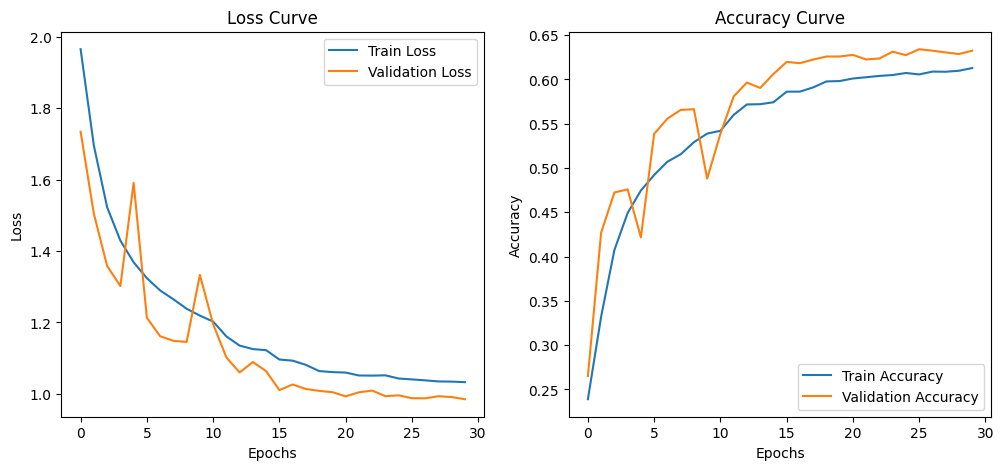

In [ ]:


# Extract values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
              precision    recall  f1-score   support

           0       0.14      0.15      0.14       958
           1       0.02      0.01      0.01       111
           2       0.16      0.09      0.11      1024
           3       0.24      0.24      0.24      1774
           4       0.17      0.23      0.20      1233
           5       0.16      0.15      0.16      1247
           6       0.11      0.10      0.10       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178

[[146   6  76 227 226 180  97]
 [ 19   1   9  28  20  22  12]
 [142   4  93 274 221 177 113]
 [282   8 139 424 418 304 199]
 [177  12 110 293 281 213 147]
 [182   9 110 324 288 193 141]
 [131   3  62 224 189 138  84]]


In [ ]:
model.save("emotion_model.keras")


In [ ]:
import os
print(os.listdir())


['.config', 'fer2013', 'archive.zip', 'emotion_model.keras', 'emotion_model.h5', 'sample_data']


In [ ]:
from google.colab import files
files.download("emotion_model.keras")
